# MobileNetV2

# 2번_웜:쿨 비율 동일하게 
warm_1 랜점 238장 + warm_2 랜덤 336장 + cool_1 238장 + cool_2 336장, 574:574 

In [ ]:
# 1-1-1

## batch_size=16, epochs=30, learning rate=0.0001(네번째자리)

## (1) 라이브러리 및 데이터 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import vgg16

import numpy as np
import cv2
import os
import glob
from PIL import Image

## 데이터 불러오고, 웜톤 0, 쿨톤 1로 레이블링

In [2]:
import random

In [3]:
def load_data(img_path, number_of_data=1148):  # warm_1 238 + warm_2 336 + cool_1 238 + cool_2 336
    # 웜톤 : 0, 쿨톤 : 1
    img_size=224
    color=3
    #이미지 데이터와 라벨(웜톤 : 0, 쿨톤 : 1) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0    
    
    warm1_files = list(glob.iglob(img_path + '/warm_1/*.jpg')) + list(glob.iglob(img_path + '/warm_1/*.JPG'))
    warm2_files = list(glob.iglob(img_path + '/warm_2/*.jpg')) + list(glob.iglob(img_path + '/warm_2/*.JPG'))

    # 각 디렉토리에서 무작위로 선택
    warm1_files = random.sample(warm1_files, 238)
    warm2_files = random.sample(warm2_files, 336)

    # 두 리스트를 합침
    warm_files = warm1_files + warm2_files

    for file in warm_files:
        img = Image.open(file)  # 이미지 열기
        img = img.resize((img_size, img_size))  # 이미지 크기 조정
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 웜톤 : 0
        idx=idx+1

                
    cool_files = (list(glob.iglob(img_path + '/cool_1/*.jpg')) + list(glob.iglob(img_path + '/cool_1/*.JPG')) +
              list(glob.iglob(img_path + '/cool_2/*.jpg')) + list(glob.iglob(img_path + '/cool_2/*.JPG')))
    
    for file in cool_files:
        img = Image.open(file)  # 이미지 열기
        img = img.resize((img_size, img_size))  # 이미지 크기 조정
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 쿨톤 : 1
        idx=idx+1  
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/project/first-repository/aiffelthon/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data"
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1148 입니다.
x_train shape: (1148, 224, 224, 3)
y_train shape: (1148,)


In [4]:
x_train.shape

(1148, 224, 224, 3)

In [5]:
x_train.dtype

dtype('int32')

In [6]:
type(x_train)

numpy.ndarray

In [8]:
x_train[0]

array([[[206, 202, 197],
        [207, 202, 197],
        [205, 202, 197],
        ...,
        [226, 228, 232],
        [225, 228, 230],
        [224, 229, 231]],

       [[207, 202, 199],
        [208, 202, 198],
        [207, 203, 197],
        ...,
        [225, 229, 232],
        [226, 229, 232],
        [226, 228, 232]],

       [[208, 201, 199],
        [207, 202, 198],
        [206, 202, 197],
        ...,
        [224, 229, 233],
        [224, 229, 233],
        [226, 229, 233]],

       ...,

       [[224, 223, 226],
        [222, 221, 226],
        [220, 219, 225],
        ...,
        [215, 216, 218],
        [218, 215, 219],
        [217, 216, 217]],

       [[221, 222, 223],
        [220, 219, 222],
        [219, 218, 222],
        ...,
        [215, 214, 218],
        [217, 214, 216],
        [218, 215, 217]],

       [[220, 221, 220],
        [223, 220, 222],
        [222, 219, 222],
        ...,
        [215, 214, 218],
        [216, 216, 219],
        [216, 218, 219]]

In [9]:
x_train[0].shape

(224, 224, 3)

## 정규화

In [10]:
x_train = x_train / 255.0

In [11]:
x_train[0]

array([[[0.80784314, 0.79215686, 0.77254902],
        [0.81176471, 0.79215686, 0.77254902],
        [0.80392157, 0.79215686, 0.77254902],
        ...,
        [0.88627451, 0.89411765, 0.90980392],
        [0.88235294, 0.89411765, 0.90196078],
        [0.87843137, 0.89803922, 0.90588235]],

       [[0.81176471, 0.79215686, 0.78039216],
        [0.81568627, 0.79215686, 0.77647059],
        [0.81176471, 0.79607843, 0.77254902],
        ...,
        [0.88235294, 0.89803922, 0.90980392],
        [0.88627451, 0.89803922, 0.90980392],
        [0.88627451, 0.89411765, 0.90980392]],

       [[0.81568627, 0.78823529, 0.78039216],
        [0.81176471, 0.79215686, 0.77647059],
        [0.80784314, 0.79215686, 0.77254902],
        ...,
        [0.87843137, 0.89803922, 0.91372549],
        [0.87843137, 0.89803922, 0.91372549],
        [0.88627451, 0.89803922, 0.91372549]],

       ...,

       [[0.87843137, 0.8745098 , 0.88627451],
        [0.87058824, 0.86666667, 0.88627451],
        [0.8627451 , 0

In [12]:
x_train.shape

(1148, 224, 224, 3)

In [13]:
print(x_train.shape)

(1148, 224, 224, 3)


In [14]:
x_train.dtype

dtype('float64')

In [15]:
type(x_train)

numpy.ndarray

## (3) train, val 분리하기

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.3,
                                                  random_state=42)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [18]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 125442    
Total params: 2,383,426
Trainable params: 2,349,314
Non-trainable params: 34,112
_________________________________________________________________


In [20]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## (5) 모델 학습하기

In [21]:
history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
51/51 [==============================] - 53s 174ms/step - loss: 0.7928 - accuracy: 0.7248 - val_loss: 0.8738 - val_accuracy: 0.6029
Epoch 2/30
51/51 [==============================] - 5s 108ms/step - loss: 0.1024 - accuracy: 0.9552 - val_loss: 0.8558 - val_accuracy: 0.6377
Epoch 3/30
51/51 [==============================] - 6s 109ms/step - loss: 0.0679 - accuracy: 0.9763 - val_loss: 0.8668 - val_accuracy: 0.6667
Epoch 4/30
51/51 [==============================] - 6s 112ms/step - loss: 0.0833 - accuracy: 0.9664 - val_loss: 0.8799 - val_accuracy: 0.6522
Epoch 5/30
51/51 [==============================] - 6s 108ms/step - loss: 0.0564 - accuracy: 0.9763 - val_loss: 1.0548 - val_accuracy: 0.6203
Epoch 6/30
51/51 [==============================] - 6s 109ms/step - loss: 0.0291 - accuracy: 0.9938 - val_loss: 1.3074 - val_accuracy: 0.6087
Epoch 7/30
51/51 [==============================] - 6s 109ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 1.2807 - val_accuracy: 0.6000
Epoch

## (6) 예측하기

In [22]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [23]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0
 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 1 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [24]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.704348


## loss, accuracy 시각화

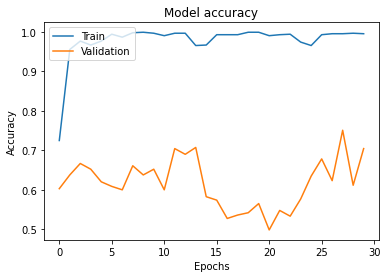

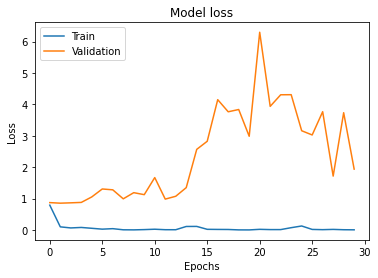

In [25]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

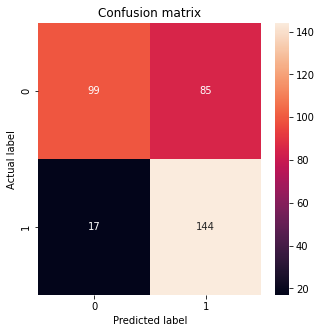

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66       184
           1       0.63      0.89      0.74       161

    accuracy                           0.70       345
   macro avg       0.74      0.72      0.70       345
weighted avg       0.75      0.70      0.70       345



In [ ]:
# 1-1-2

## 정규화, random_state=42, batch_size=16, epochs=50, learning rate=0.0001(네번째자리),

## 데이터 바로 사용해도 되는지 확인

In [28]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [29]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [31]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [32]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
51/51 [==============================] - 11s 133ms/step - loss: 0.7207 - accuracy: 0.7447 - val_loss: 1.0808 - val_accuracy: 0.5739
Epoch 2/50
51/51 [==============================] - 6s 108ms/step - loss: 0.1724 - accuracy: 0.9290 - val_loss: 1.5786 - val_accuracy: 0.5797
Epoch 3/50
51/51 [==============================] - 6s 108ms/step - loss: 0.0964 - accuracy: 0.9589 - val_loss: 1.3710 - val_accuracy: 0.5913
Epoch 4/50
51/51 [==============================] - 6s 109ms/step - loss: 0.0469 - accuracy: 0.9813 - val_loss: 1.1668 - val_accuracy: 0.6580
Epoch 5/50
51/51 [==============================] - 6s 109ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.8970 - val_accuracy: 0.6609
Epoch 6/50
51/51 [==============================] - 6s 109ms/step - loss: 0.0327 - accuracy: 0.9888 - val_loss: 0.8987 - val_accuracy: 0.6609
Epoch 7/50
51/51 [==============================] - 6s 111ms/step - loss: 0.0120 - accuracy: 0.9975 - val_loss: 0.8801 - val_accuracy: 0.6667
Epoch

## (6) 예측하기

In [33]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [34]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 0 1 1 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [35]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.771014


## loss, accuracy 시각화

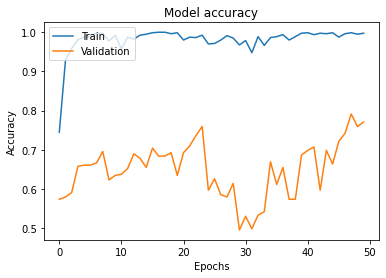

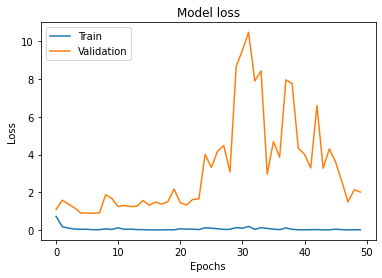

In [36]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

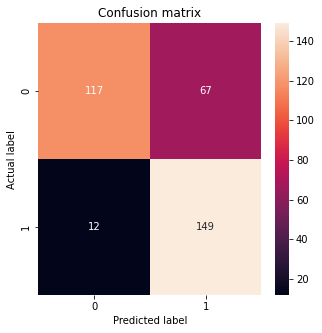

In [37]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [38]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       184
           1       0.69      0.93      0.79       161

    accuracy                           0.77       345
   macro avg       0.80      0.78      0.77       345
weighted avg       0.81      0.77      0.77       345



In [ ]:
## 1-2-1

## 정규화, random_state=42, batch_size=16, epochs=30, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [39]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [40]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [41]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [42]:
history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
51/51 [==============================] - 11s 147ms/step - loss: 0.9823 - accuracy: 0.5841 - val_loss: 0.9165 - val_accuracy: 0.5101
Epoch 2/30
51/51 [==============================] - 6s 112ms/step - loss: 0.5272 - accuracy: 0.7597 - val_loss: 0.8996 - val_accuracy: 0.5507
Epoch 3/30
51/51 [==============================] - 6s 111ms/step - loss: 0.3438 - accuracy: 0.8481 - val_loss: 0.9080 - val_accuracy: 0.5681
Epoch 4/30
51/51 [==============================] - 6s 113ms/step - loss: 0.2534 - accuracy: 0.8954 - val_loss: 0.8762 - val_accuracy: 0.5797
Epoch 5/30
51/51 [==============================] - 6s 115ms/step - loss: 0.1911 - accuracy: 0.9240 - val_loss: 0.9167 - val_accuracy: 0.5739
Epoch 6/30
51/51 [==============================] - 6s 113ms/step - loss: 0.1379 - accuracy: 0.9601 - val_loss: 0.8971 - val_accuracy: 0.5855
Epoch 7/30
51/51 [==============================] - 6s 114ms/step - loss: 0.0979 - accuracy: 0.9751 - val_loss: 0.9194 - val_accuracy: 0.5797
Epoch

## (6) 예측하기

In [43]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [44]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [45]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.704348


## loss, accuracy 시각화

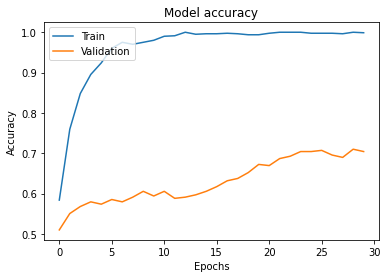

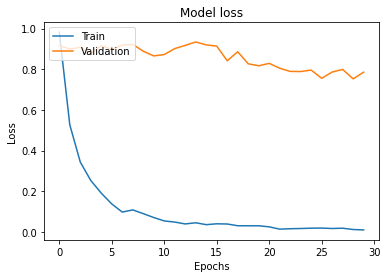

In [46]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

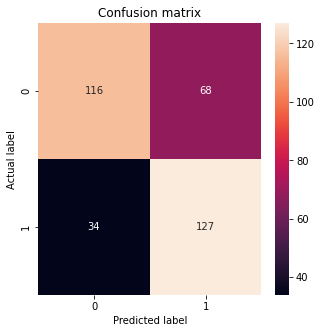

In [47]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [48]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       184
           1       0.65      0.79      0.71       161

    accuracy                           0.70       345
   macro avg       0.71      0.71      0.70       345
weighted avg       0.72      0.70      0.70       345



In [ ]:
# 1-2-2

## 정규화, random_state=42, batch_size=16, epochs=50, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [49]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [50]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [52]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [53]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
51/51 [==============================] - 11s 138ms/step - loss: 1.0357 - accuracy: 0.5342 - val_loss: 1.0977 - val_accuracy: 0.5420
Epoch 2/50
51/51 [==============================] - 6s 112ms/step - loss: 0.5394 - accuracy: 0.7522 - val_loss: 1.0655 - val_accuracy: 0.5536
Epoch 3/50
51/51 [==============================] - 6s 112ms/step - loss: 0.3639 - accuracy: 0.8493 - val_loss: 1.0169 - val_accuracy: 0.5710
Epoch 4/50
51/51 [==============================] - 6s 115ms/step - loss: 0.2406 - accuracy: 0.9141 - val_loss: 1.0776 - val_accuracy: 0.5594
Epoch 5/50
51/51 [==============================] - 6s 114ms/step - loss: 0.1725 - accuracy: 0.9377 - val_loss: 1.1007 - val_accuracy: 0.5565
Epoch 6/50
51/51 [==============================] - 6s 113ms/step - loss: 0.1497 - accuracy: 0.9465 - val_loss: 1.0059 - val_accuracy: 0.5942
Epoch 7/50
51/51 [==============================] - 6s 113ms/step - loss: 0.1100 - accuracy: 0.9738 - val_loss: 1.0786 - val_accuracy: 0.5971
Epoch

## (6) 예측하기

In [54]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [55]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [56]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.736232


## loss, accuracy 시각화

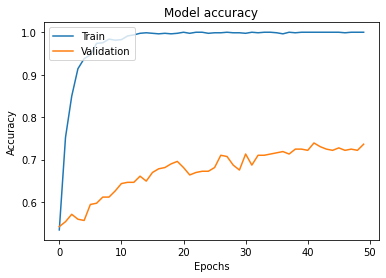

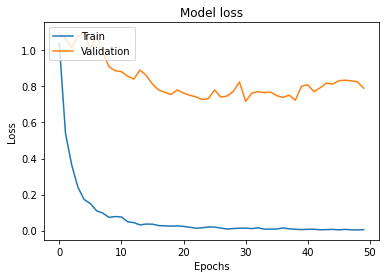

In [57]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

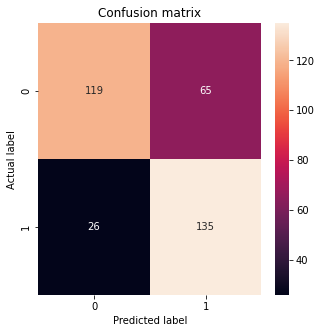

In [58]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [59]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.82      0.65      0.72       184
           1       0.68      0.84      0.75       161

    accuracy                           0.74       345
   macro avg       0.75      0.74      0.74       345
weighted avg       0.75      0.74      0.73       345



In [ ]:
# 1-3-1

## 정규화, random_state=42, batch_size=16, epochs=30, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [60]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [61]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [62]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [63]:
history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
51/51 [==============================] - 10s 135ms/step - loss: 1.0826 - accuracy: 0.5156 - val_loss: 0.9627 - val_accuracy: 0.5304
Epoch 2/30
51/51 [==============================] - 6s 111ms/step - loss: 1.0254 - accuracy: 0.5455 - val_loss: 0.9742 - val_accuracy: 0.5333
Epoch 3/30
51/51 [==============================] - 6s 110ms/step - loss: 0.9498 - accuracy: 0.5405 - val_loss: 0.9661 - val_accuracy: 0.5362
Epoch 4/30
51/51 [==============================] - 6s 109ms/step - loss: 0.8796 - accuracy: 0.5878 - val_loss: 0.9464 - val_accuracy: 0.5333
Epoch 5/30
51/51 [==============================] - 6s 110ms/step - loss: 0.8478 - accuracy: 0.5990 - val_loss: 0.9436 - val_accuracy: 0.5304
Epoch 6/30
51/51 [==============================] - 6s 110ms/step - loss: 0.8008 - accuracy: 0.6189 - val_loss: 0.9435 - val_accuracy: 0.5478
Epoch 7/30
51/51 [==============================] - 6s 110ms/step - loss: 0.7230 - accuracy: 0.6513 - val_loss: 0.9428 - val_accuracy: 0.5536
Epoch

## (6) 예측하기

In [64]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [65]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [66]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.623188


## loss, accuracy 시각화

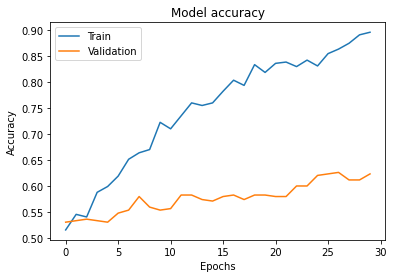

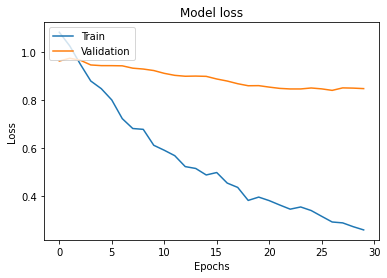

In [67]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

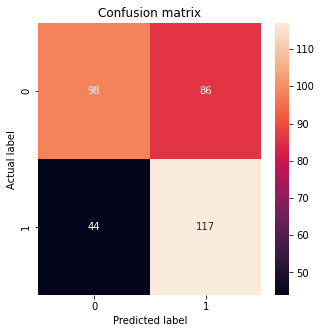

In [68]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [69]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       184
           1       0.58      0.73      0.64       161

    accuracy                           0.62       345
   macro avg       0.63      0.63      0.62       345
weighted avg       0.64      0.62      0.62       345



In [ ]:
# 1-3-2

## 정규화, random_state=42, batch_size=16, epochs=50, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [70]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [71]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [72]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [73]:
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
51/51 [==============================] - 11s 139ms/step - loss: 1.2211 - accuracy: 0.5255 - val_loss: 1.2950 - val_accuracy: 0.4493
Epoch 2/50
51/51 [==============================] - 5s 108ms/step - loss: 0.9779 - accuracy: 0.5554 - val_loss: 1.1929 - val_accuracy: 0.4580
Epoch 3/50
51/51 [==============================] - 6s 110ms/step - loss: 0.9254 - accuracy: 0.5616 - val_loss: 1.1310 - val_accuracy: 0.4464
Epoch 4/50
51/51 [==============================] - 6s 110ms/step - loss: 0.8629 - accuracy: 0.5978 - val_loss: 1.0712 - val_accuracy: 0.4464
Epoch 5/50
51/51 [==============================] - 6s 113ms/step - loss: 0.8130 - accuracy: 0.6189 - val_loss: 1.0373 - val_accuracy: 0.4435
Epoch 6/50
51/51 [==============================] - 6s 110ms/step - loss: 0.7607 - accuracy: 0.6550 - val_loss: 0.9957 - val_accuracy: 0.4551
Epoch 7/50
51/51 [==============================] - 6s 111ms/step - loss: 0.7268 - accuracy: 0.6762 - val_loss: 0.9578 - val_accuracy: 0.4522
Epoch

## (6) 예측하기

In [74]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [75]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [76]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.675362


## loss, accuracy 시각화

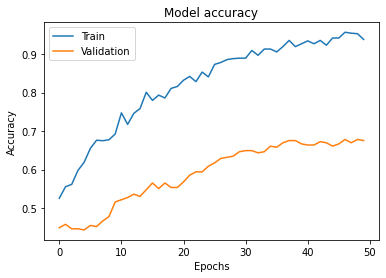

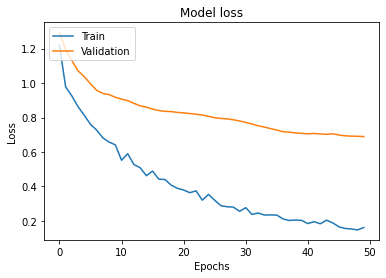

In [77]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

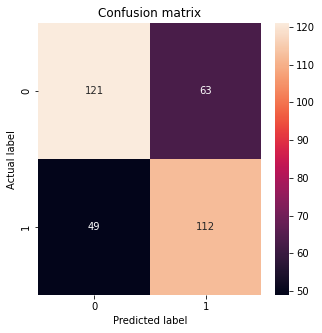

In [78]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [79]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       184
           1       0.64      0.70      0.67       161

    accuracy                           0.68       345
   macro avg       0.68      0.68      0.68       345
weighted avg       0.68      0.68      0.68       345



In [ ]:
# 2-1-1

## 정규화, random_state=42, batch_size=32, epochs=30, learning rate=0.0001(네번째자리),

## 데이터 바로 사용해도 되는지 확인

In [80]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [81]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [82]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [83]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
26/26 [==============================] - 11s 252ms/step - loss: 0.7036 - accuracy: 0.7372 - val_loss: 1.0079 - val_accuracy: 0.5449
Epoch 2/30
26/26 [==============================] - 5s 207ms/step - loss: 0.0978 - accuracy: 0.9738 - val_loss: 1.8412 - val_accuracy: 0.5333
Epoch 3/30
26/26 [==============================] - 5s 207ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 1.2660 - val_accuracy: 0.5507
Epoch 4/30
26/26 [==============================] - 5s 203ms/step - loss: 0.0502 - accuracy: 0.9838 - val_loss: 1.1749 - val_accuracy: 0.5652
Epoch 5/30
26/26 [==============================] - 5s 207ms/step - loss: 0.0146 - accuracy: 0.9975 - val_loss: 1.2818 - val_accuracy: 0.5739
Epoch 6/30
26/26 [==============================] - 5s 208ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.9751 - val_accuracy: 0.5913
Epoch 7/30
26/26 [==============================] - 5s 207ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 1.1224 - val_accuracy: 0.6116
Epoch

## (6) 예측하기

In [84]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [85]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 0 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [86]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.730435


## loss, accuracy 시각화

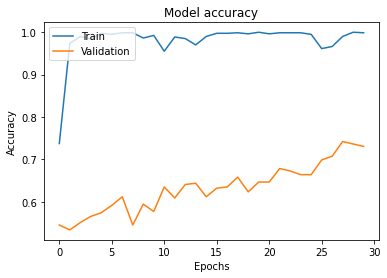

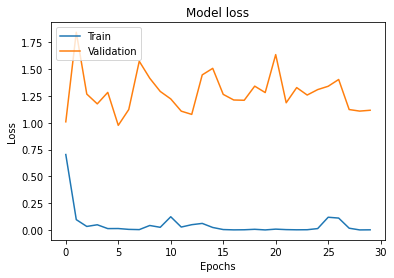

In [87]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

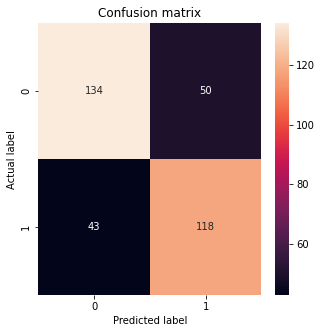

In [88]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [89]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       184
           1       0.70      0.73      0.72       161

    accuracy                           0.73       345
   macro avg       0.73      0.73      0.73       345
weighted avg       0.73      0.73      0.73       345



In [ ]:
# 2-1-2

## 정규화, random_state=42, batch_size=32, epochs=50, learning rate=0.0001(네번째자리),

## 데이터 바로 사용해도 되는지 확인

In [90]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [91]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [93]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [94]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
26/26 [==============================] - 10s 260ms/step - loss: 0.8096 - accuracy: 0.7024 - val_loss: 1.5700 - val_accuracy: 0.5362
Epoch 2/50
26/26 [==============================] - 5s 211ms/step - loss: 0.1104 - accuracy: 0.9589 - val_loss: 2.0856 - val_accuracy: 0.5391
Epoch 3/50
26/26 [==============================] - 5s 211ms/step - loss: 0.0283 - accuracy: 0.9950 - val_loss: 2.7334 - val_accuracy: 0.5362
Epoch 4/50
26/26 [==============================] - 5s 212ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 1.9666 - val_accuracy: 0.5304
Epoch 5/50
26/26 [==============================] - 6s 213ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.0504 - val_accuracy: 0.5333
Epoch 6/50
26/26 [==============================] - 5s 210ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.8899 - val_accuracy: 0.5333
Epoch 7/50
26/26 [==============================] - 5s 212ms/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 2.3987 - val_accuracy: 0.5333
Epoch

## (6) 예측하기

In [95]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [96]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [97]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.695652


## loss, accuracy 시각화

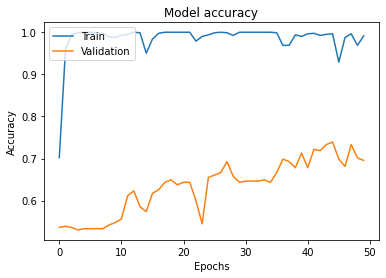

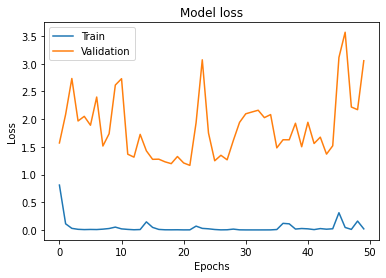

In [98]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

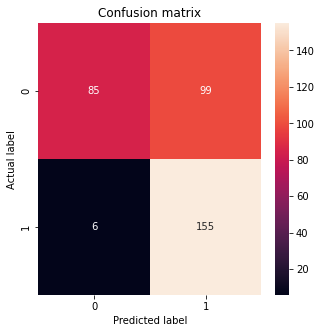

In [99]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [100]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62       184
           1       0.61      0.96      0.75       161

    accuracy                           0.70       345
   macro avg       0.77      0.71      0.68       345
weighted avg       0.78      0.70      0.68       345



In [ ]:
# 2-2-1

## 정규화, random_state=42, batch_size=32, epochs=30, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [101]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [102]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [104]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [105]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
26/26 [==============================] - 11s 273ms/step - loss: 0.9966 - accuracy: 0.5716 - val_loss: 1.2736 - val_accuracy: 0.4957
Epoch 2/30
26/26 [==============================] - 6s 215ms/step - loss: 0.5639 - accuracy: 0.7372 - val_loss: 1.2840 - val_accuracy: 0.5043
Epoch 3/30
26/26 [==============================] - 6s 217ms/step - loss: 0.3469 - accuracy: 0.8443 - val_loss: 1.3305 - val_accuracy: 0.5159
Epoch 4/30
26/26 [==============================] - 6s 213ms/step - loss: 0.2595 - accuracy: 0.8979 - val_loss: 1.1209 - val_accuracy: 0.5275
Epoch 5/30
26/26 [==============================] - 6s 213ms/step - loss: 0.2045 - accuracy: 0.9278 - val_loss: 1.1411 - val_accuracy: 0.5304
Epoch 6/30
26/26 [==============================] - 6s 215ms/step - loss: 0.1643 - accuracy: 0.9427 - val_loss: 1.1402 - val_accuracy: 0.5391
Epoch 7/30
26/26 [==============================] - 6s 216ms/step - loss: 0.1284 - accuracy: 0.9664 - val_loss: 1.1353 - val_accuracy: 0.5333
Epoch

## (6) 예측하기

In [106]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [107]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0
 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 1 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [108]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.663768


## loss, accuracy 시각화

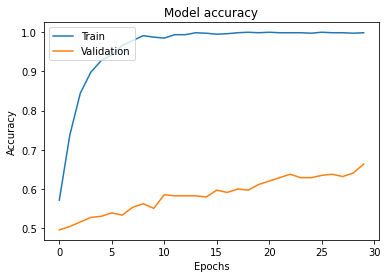

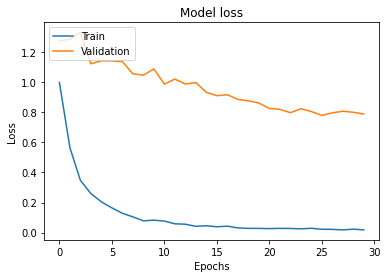

In [109]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

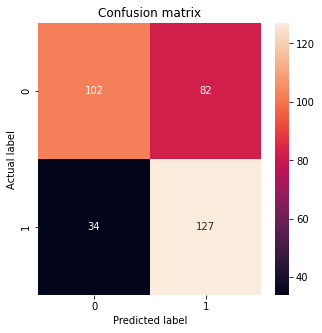

In [110]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [111]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.75      0.55      0.64       184
           1       0.61      0.79      0.69       161

    accuracy                           0.66       345
   macro avg       0.68      0.67      0.66       345
weighted avg       0.68      0.66      0.66       345



In [ ]:
# 2-2-2

## 정규화, random_state=42, batch_size=32, epochs=50, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [112]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [113]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [114]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [115]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
26/26 [==============================] - 10s 260ms/step - loss: 1.0500 - accuracy: 0.5255 - val_loss: 1.1314 - val_accuracy: 0.5188
Epoch 2/50
26/26 [==============================] - 6s 212ms/step - loss: 0.5311 - accuracy: 0.7547 - val_loss: 1.1412 - val_accuracy: 0.5362
Epoch 3/50
26/26 [==============================] - 5s 211ms/step - loss: 0.3897 - accuracy: 0.8306 - val_loss: 1.1506 - val_accuracy: 0.5391
Epoch 4/50
26/26 [==============================] - 5s 211ms/step - loss: 0.2481 - accuracy: 0.9066 - val_loss: 1.0409 - val_accuracy: 0.5478
Epoch 5/50
26/26 [==============================] - 6s 214ms/step - loss: 0.1993 - accuracy: 0.9328 - val_loss: 1.0890 - val_accuracy: 0.5391
Epoch 6/50
26/26 [==============================] - 6s 213ms/step - loss: 0.1506 - accuracy: 0.9664 - val_loss: 1.0945 - val_accuracy: 0.5420
Epoch 7/50
26/26 [==============================] - 6s 213ms/step - loss: 0.1235 - accuracy: 0.9726 - val_loss: 1.0262 - val_accuracy: 0.5362
Epoch

## (6) 예측하기

In [116]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [117]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [118]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.675362


## loss, accuracy 시각화

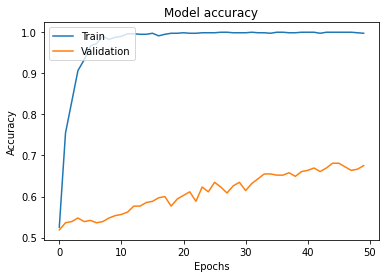

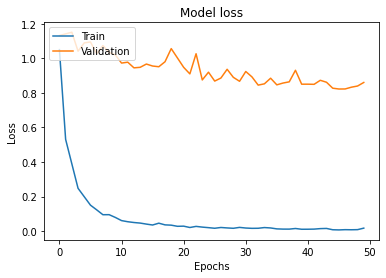

In [119]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

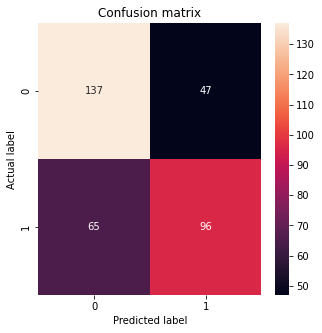

In [120]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [121]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       184
           1       0.67      0.60      0.63       161

    accuracy                           0.68       345
   macro avg       0.67      0.67      0.67       345
weighted avg       0.68      0.68      0.67       345



In [ ]:
## 2-3-1

## 정규화, random_state=42, batch_size=32, epochs=30, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [122]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [123]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [124]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [125]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
26/26 [==============================] - 11s 271ms/step - loss: 1.1004 - accuracy: 0.5218 - val_loss: 0.9754 - val_accuracy: 0.5101
Epoch 2/30
26/26 [==============================] - 5s 211ms/step - loss: 1.0386 - accuracy: 0.5392 - val_loss: 0.9726 - val_accuracy: 0.5130
Epoch 3/30
26/26 [==============================] - 5s 210ms/step - loss: 0.9937 - accuracy: 0.5342 - val_loss: 0.9706 - val_accuracy: 0.5072
Epoch 4/30
26/26 [==============================] - 6s 214ms/step - loss: 0.9336 - accuracy: 0.5629 - val_loss: 0.9659 - val_accuracy: 0.5246
Epoch 5/30
26/26 [==============================] - 6s 216ms/step - loss: 0.8725 - accuracy: 0.6127 - val_loss: 0.9592 - val_accuracy: 0.5014
Epoch 6/30
26/26 [==============================] - 5s 212ms/step - loss: 0.8242 - accuracy: 0.6090 - val_loss: 0.9599 - val_accuracy: 0.5188
Epoch 7/30
26/26 [==============================] - 6s 216ms/step - loss: 0.8038 - accuracy: 0.6127 - val_loss: 0.9633 - val_accuracy: 0.5188
Epoch

## (6) 예측하기

In [126]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [127]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [128]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.579710


## loss, accuracy 시각화

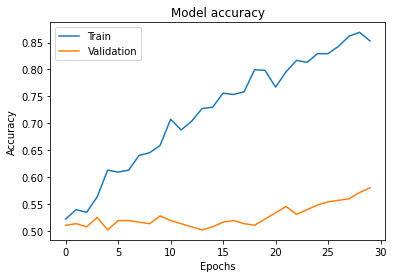

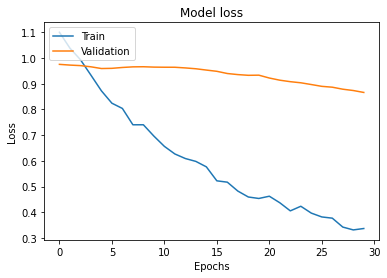

In [129]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

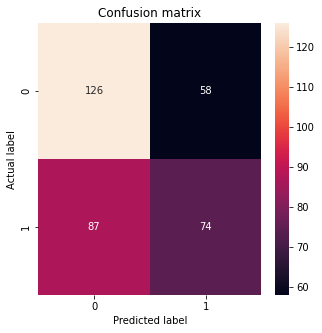

In [130]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [131]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       184
           1       0.56      0.46      0.51       161

    accuracy                           0.58       345
   macro avg       0.58      0.57      0.57       345
weighted avg       0.58      0.58      0.57       345



In [ ]:
# 2-3-2

## 정규화, random_state=42, batch_size=32, epochs=50, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [132]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [133]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [134]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [135]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
26/26 [==============================] - 10s 262ms/step - loss: 1.2208 - accuracy: 0.4770 - val_loss: 1.2845 - val_accuracy: 0.4580
Epoch 2/50
26/26 [==============================] - 6s 213ms/step - loss: 1.2036 - accuracy: 0.4732 - val_loss: 1.2112 - val_accuracy: 0.4580
Epoch 3/50
26/26 [==============================] - 6s 223ms/step - loss: 1.1383 - accuracy: 0.4844 - val_loss: 1.1841 - val_accuracy: 0.4696
Epoch 4/50
26/26 [==============================] - 6s 221ms/step - loss: 1.0558 - accuracy: 0.5118 - val_loss: 1.1481 - val_accuracy: 0.4754
Epoch 5/50
26/26 [==============================] - 6s 214ms/step - loss: 1.0048 - accuracy: 0.5218 - val_loss: 1.1176 - val_accuracy: 0.4928
Epoch 6/50
26/26 [==============================] - 6s 217ms/step - loss: 0.9748 - accuracy: 0.5355 - val_loss: 1.0859 - val_accuracy: 0.4899
Epoch 7/50
26/26 [==============================] - 6s 216ms/step - loss: 0.9252 - accuracy: 0.5455 - val_loss: 1.0557 - val_accuracy: 0.4841
Epoch

## (6) 예측하기

In [136]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [137]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [138]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.675362


## loss, accuracy 시각화

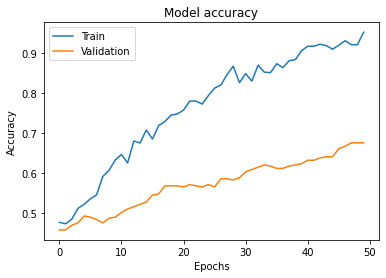

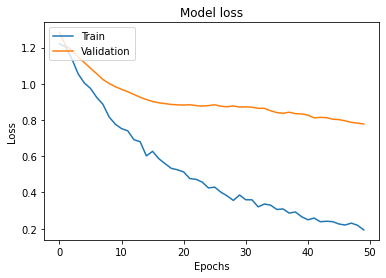

In [139]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

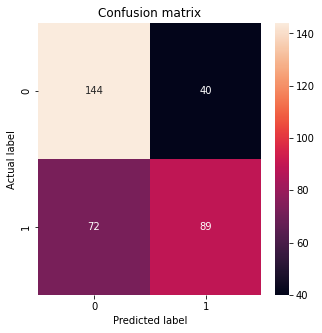

In [140]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [141]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       184
           1       0.69      0.55      0.61       161

    accuracy                           0.68       345
   macro avg       0.68      0.67      0.67       345
weighted avg       0.68      0.68      0.67       345



In [ ]:
# 3-1-1

## 정규화, random_state=42, batch_size=64, epochs=30, learning rate=0.0001(네번째자리),

## 데이터 바로 사용해도 되는지 확인

In [142]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [143]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [144]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [145]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
13/13 [==============================] - 13s 635ms/step - loss: 0.7964 - accuracy: 0.6986 - val_loss: 0.8737 - val_accuracy: 0.5826
Epoch 2/30
13/13 [==============================] - 5s 424ms/step - loss: 0.1269 - accuracy: 0.9502 - val_loss: 1.9123 - val_accuracy: 0.5391
Epoch 3/30
13/13 [==============================] - 6s 429ms/step - loss: 0.0213 - accuracy: 0.9950 - val_loss: 1.1563 - val_accuracy: 0.5884
Epoch 4/30
13/13 [==============================] - 6s 428ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.5789 - val_accuracy: 0.5507
Epoch 5/30
13/13 [==============================] - 6s 424ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.5412 - val_accuracy: 0.5478
Epoch 6/30
13/13 [==============================] - 6s 429ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5006 - val_accuracy: 0.5478
Epoch 7/30
13/13 [==============================] - 6s 431ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.5021 - val_accuracy: 0.5536
Epoch

## (6) 예측하기

In [146]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [147]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [148]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.585507


## loss, accuracy 시각화

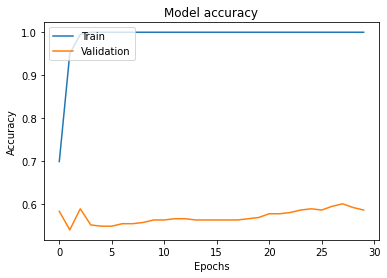

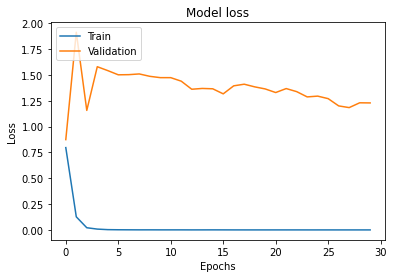

In [149]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

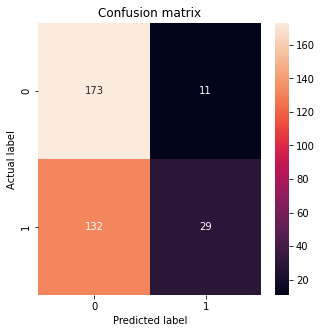

In [150]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [151]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71       184
           1       0.72      0.18      0.29       161

    accuracy                           0.59       345
   macro avg       0.65      0.56      0.50       345
weighted avg       0.64      0.59      0.51       345



In [ ]:
# 3-1-2

## 정규화, random_state=42, batch_size=64, epochs=50, learning rate=0.0001(네번째자리),

## 데이터 바로 사용해도 되는지 확인

In [152]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [153]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [154]:
learning_rate = 0.0001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [155]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
13/13 [==============================] - 10s 525ms/step - loss: 1.0684 - accuracy: 0.6077 - val_loss: 0.9593 - val_accuracy: 0.5884
Epoch 2/50
13/13 [==============================] - 5s 422ms/step - loss: 0.1843 - accuracy: 0.9265 - val_loss: 1.0292 - val_accuracy: 0.5710
Epoch 3/50
13/13 [==============================] - 6s 432ms/step - loss: 0.0260 - accuracy: 0.9963 - val_loss: 0.9822 - val_accuracy: 0.6029
Epoch 4/50
13/13 [==============================] - 5s 422ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.9214 - val_accuracy: 0.6174
Epoch 5/50
13/13 [==============================] - 6s 434ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8837 - val_accuracy: 0.6203
Epoch 6/50
13/13 [==============================] - 6s 425ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8795 - val_accuracy: 0.6261
Epoch 7/50
13/13 [==============================] - 6s 431ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.8814 - val_accuracy: 0.6290
Epoch

## (6) 예측하기

In [156]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [157]:
print(pred_class)
print(y_val)
print(pred)

[0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [158]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.704348


## loss, accuracy 시각화

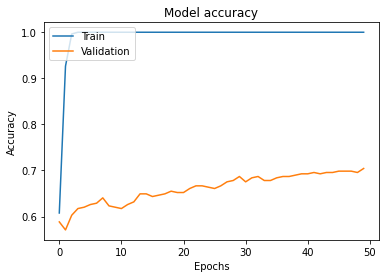

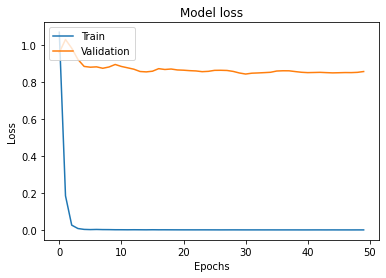

In [159]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

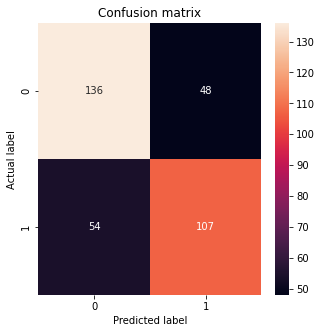

In [160]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [161]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       184
           1       0.69      0.66      0.68       161

    accuracy                           0.70       345
   macro avg       0.70      0.70      0.70       345
weighted avg       0.70      0.70      0.70       345



In [ ]:
# 3-2-1

## 정규화, random_state=42, batch_size=64, epochs=30, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [162]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [163]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [164]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [165]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
13/13 [==============================] - 10s 531ms/step - loss: 0.9463 - accuracy: 0.5729 - val_loss: 0.9017 - val_accuracy: 0.5681
Epoch 2/30
13/13 [==============================] - 5s 407ms/step - loss: 0.5428 - accuracy: 0.7447 - val_loss: 0.8953 - val_accuracy: 0.5739
Epoch 3/30
13/13 [==============================] - 5s 407ms/step - loss: 0.3548 - accuracy: 0.8431 - val_loss: 0.9049 - val_accuracy: 0.5710
Epoch 4/30
13/13 [==============================] - 5s 410ms/step - loss: 0.2311 - accuracy: 0.9178 - val_loss: 0.8922 - val_accuracy: 0.5797
Epoch 5/30
13/13 [==============================] - 5s 418ms/step - loss: 0.1743 - accuracy: 0.9502 - val_loss: 0.9033 - val_accuracy: 0.5565
Epoch 6/30
13/13 [==============================] - 5s 414ms/step - loss: 0.1234 - accuracy: 0.9776 - val_loss: 0.8901 - val_accuracy: 0.5710
Epoch 7/30
13/13 [==============================] - 5s 415ms/step - loss: 0.0943 - accuracy: 0.9913 - val_loss: 0.9146 - val_accuracy: 0.5768
Epoch

## (6) 예측하기

In [166]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [167]:
print(pred_class)
print(y_val)
print(pred)

[1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [168]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.585507


## loss, accuracy 시각화

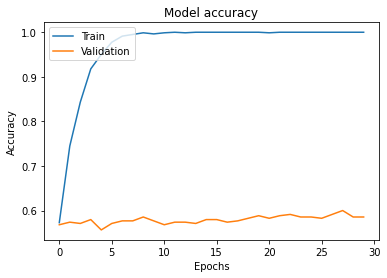

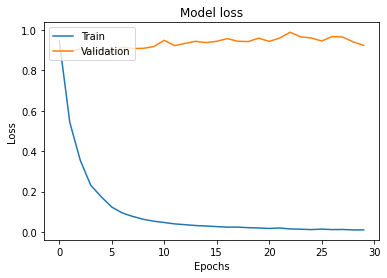

In [169]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

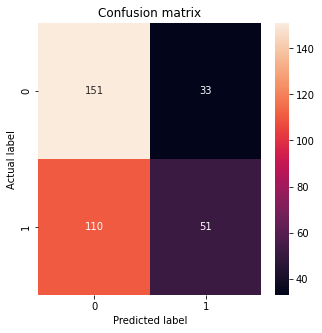

In [170]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [171]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       184
           1       0.61      0.32      0.42       161

    accuracy                           0.59       345
   macro avg       0.59      0.57      0.55       345
weighted avg       0.59      0.59      0.56       345



In [ ]:
# 3-2-2

## 정규화, random_state=42, batch_size=64, epochs=50, learning rate=0.00001(다섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [172]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [173]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [174]:
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [175]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
13/13 [==============================] - 10s 518ms/step - loss: 1.1427 - accuracy: 0.5081 - val_loss: 1.1001 - val_accuracy: 0.5420
Epoch 2/50
13/13 [==============================] - 6s 430ms/step - loss: 0.6447 - accuracy: 0.6999 - val_loss: 0.9821 - val_accuracy: 0.5420
Epoch 3/50
13/13 [==============================] - 5s 412ms/step - loss: 0.4316 - accuracy: 0.8095 - val_loss: 0.9765 - val_accuracy: 0.5391
Epoch 4/50
13/13 [==============================] - 5s 414ms/step - loss: 0.3059 - accuracy: 0.8804 - val_loss: 0.9791 - val_accuracy: 0.5449
Epoch 5/50
13/13 [==============================] - 5s 417ms/step - loss: 0.2048 - accuracy: 0.9328 - val_loss: 0.9551 - val_accuracy: 0.5478
Epoch 6/50
13/13 [==============================] - 5s 414ms/step - loss: 0.1359 - accuracy: 0.9813 - val_loss: 0.9462 - val_accuracy: 0.5565
Epoch 7/50
13/13 [==============================] - 5s 415ms/step - loss: 0.1189 - accuracy: 0.9888 - val_loss: 0.9440 - val_accuracy: 0.5594
Epoch

## (6) 예측하기

In [176]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [177]:
print(pred_class)
print(y_val)
print(pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [178]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.623188


## loss, accuracy 시각화

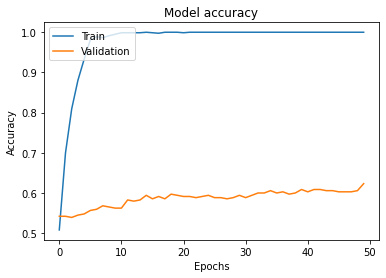

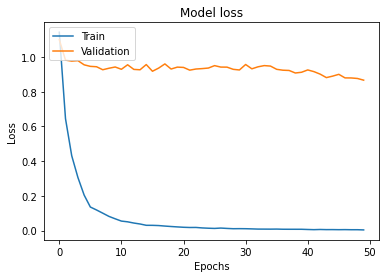

In [179]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

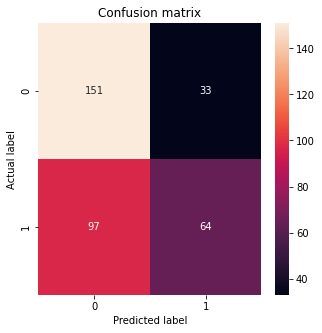

In [180]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [181]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70       184
           1       0.66      0.40      0.50       161

    accuracy                           0.62       345
   macro avg       0.63      0.61      0.60       345
weighted avg       0.63      0.62      0.60       345



In [ ]:
# 3-3-1

## 정규화, random_state=42, batch_size=64, epochs=30, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [182]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [183]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [184]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [185]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
13/13 [==============================] - 11s 545ms/step - loss: 1.2220 - accuracy: 0.5056 - val_loss: 0.8434 - val_accuracy: 0.5681
Epoch 2/30
13/13 [==============================] - 5s 417ms/step - loss: 1.1671 - accuracy: 0.5143 - val_loss: 0.8501 - val_accuracy: 0.5971
Epoch 3/30
13/13 [==============================] - 6s 428ms/step - loss: 1.0801 - accuracy: 0.5205 - val_loss: 0.8570 - val_accuracy: 0.5826
Epoch 4/30
13/13 [==============================] - 5s 423ms/step - loss: 1.0101 - accuracy: 0.5193 - val_loss: 0.8627 - val_accuracy: 0.5913
Epoch 5/30
13/13 [==============================] - 5s 421ms/step - loss: 0.9865 - accuracy: 0.5268 - val_loss: 0.8631 - val_accuracy: 0.5884
Epoch 6/30
13/13 [==============================] - 5s 423ms/step - loss: 0.9188 - accuracy: 0.5816 - val_loss: 0.8659 - val_accuracy: 0.5942
Epoch 7/30
13/13 [==============================] - 5s 417ms/step - loss: 0.8812 - accuracy: 0.5803 - val_loss: 0.8652 - val_accuracy: 0.5913
Epoch

## (6) 예측하기

In [186]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [187]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 1 0 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [188]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.565217


## loss, accuracy 시각화

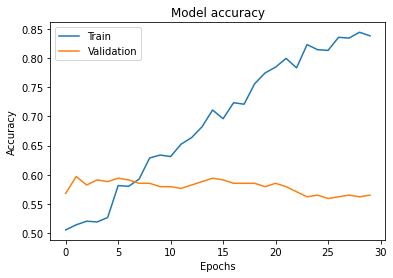

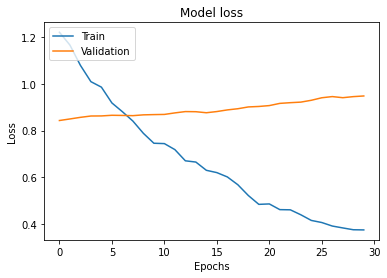

In [189]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

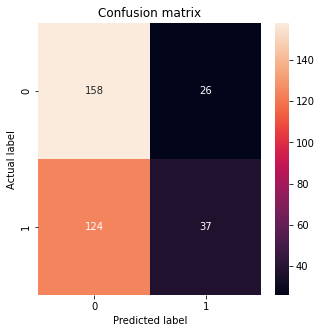

In [190]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [191]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.56      0.86      0.68       184
           1       0.59      0.23      0.33       161

    accuracy                           0.57       345
   macro avg       0.57      0.54      0.50       345
weighted avg       0.57      0.57      0.52       345



In [ ]:
# 3-3-2

## 정규화, random_state=42, batch_size=64, epochs=50, learning rate=0.000001(여섯번째자리),

## 데이터 바로 사용해도 되는지 확인

In [192]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (803, 224, 224, 3)
y_train:  (803,)
x_val:  (345, 224, 224, 3)
y_val:  (345,)


## (4) 모델 정의 및 컴파일
## MobileNetV2 모델 쌓기

In [193]:
# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성
model = Sequential()
model.add(base_model)  # MobileNetV2를 기본 모델로 추가
model.add(Flatten())   # 피처를 1D 벡터로 평탄화
model.add(Dense(2, activation='softmax'))  # 출력 레이어 추가

In [194]:
learning_rate = 0.000001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## (5) 모델 학습하기

In [195]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
13/13 [==============================] - 10s 523ms/step - loss: 1.2136 - accuracy: 0.5205 - val_loss: 1.2401 - val_accuracy: 0.5217
Epoch 2/50
13/13 [==============================] - 6s 429ms/step - loss: 1.0690 - accuracy: 0.5492 - val_loss: 1.1734 - val_accuracy: 0.5188
Epoch 3/50
13/13 [==============================] - 6s 426ms/step - loss: 0.9996 - accuracy: 0.5729 - val_loss: 1.1299 - val_accuracy: 0.5101
Epoch 4/50
13/13 [==============================] - 6s 432ms/step - loss: 0.9404 - accuracy: 0.5866 - val_loss: 1.1116 - val_accuracy: 0.5072
Epoch 5/50
13/13 [==============================] - 6s 438ms/step - loss: 0.9143 - accuracy: 0.5940 - val_loss: 1.1010 - val_accuracy: 0.5072
Epoch 6/50
13/13 [==============================] - 6s 432ms/step - loss: 0.8711 - accuracy: 0.6040 - val_loss: 1.1026 - val_accuracy: 0.5072
Epoch 7/50
13/13 [==============================] - 6s 436ms/step - loss: 0.8477 - accuracy: 0.6077 - val_loss: 1.1031 - val_accuracy: 0.5101
Epoch

## (6) 예측하기

In [196]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)

In [197]:
print(pred_class)
print(y_val)
print(pred)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0

In [198]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.553623


## loss, accuracy 시각화

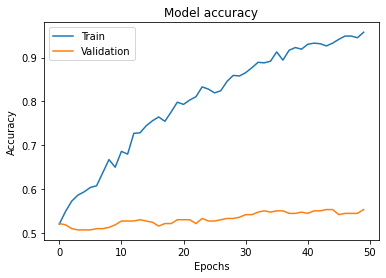

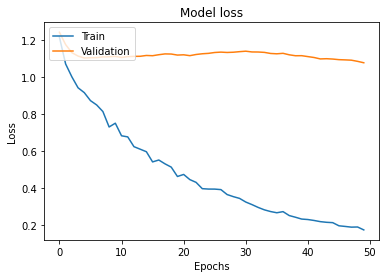

In [199]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## confusion_matrix

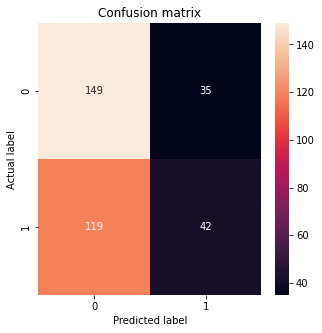

In [200]:
# confusion matrix 생성
cm = confusion_matrix(y_val, pred_class)

# confusion matrix 출력
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## classification_report

In [201]:
print(classification_report(y_val, pred_class))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       184
           1       0.55      0.26      0.35       161

    accuracy                           0.55       345
   macro avg       0.55      0.54      0.51       345
weighted avg       0.55      0.55      0.52       345



In [18]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# # EarlyStopping과 ModelCheckpoint 객체를 생성합니다.
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# # fit 함수를 호출할 때 callbacks 매개변수에 early_stopping과 model_checkpoint를 전달합니다.
# hist = model.fit(train_generator, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
13/13 [==============================] - 5s 366ms/step - loss: 1.5118 - accuracy: 0.6963 - val_loss: 36.2442 - val_accuracy: 0.7491


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
13/13 [==============================] - 5s 338ms/step - loss: 1.4348 - accuracy: 0.7062 - val_loss: 40.8004 - val_accuracy: 0.2509
Epoch 3/30
13/13 [==============================] - 5s 344ms/step - loss: 2.3824 - accuracy: 0.6889 - val_loss: 69.5486 - val_accuracy: 0.7491
Epoch 4/30
13/13 [==============================] - 5s 348ms/step - loss: 1.3403 - accuracy: 0.6963 - val_loss: 0.5931 - val_accuracy: 0.7565
Epoch 5/30
13/13 [==============================] - 5s 348ms/step - loss: 1.6925 - accuracy: 0.6864 - val_loss: 69.8222 - val_accuracy: 0.2546
Epoch 6/30
13/13 [==============================] - 5s 338ms/step - loss: 1.2034 - accuracy: 0.7210 - val_loss: 47.7352 - val_accuracy: 0.6679
Epoch 7/30
13/13 [==============================] - 5s 353ms/step - loss: 1.9310 - accuracy: 0.6963 - val_loss: 61.8602 - val_accuracy: 0.7491
